# Check data cleanliness of each file for...

- Missing values.
- Abnormalities.
- Data types.
- Data entry errors.
- Outliers.

In [238]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Train Data Set
train.csv, test.csv - the training and test set of the main dataset. The training set consists of data from 2007, 2009, 2011, and 2013, while in the test set you are requested to predict the test results for 2008, 2010, 2012, and 2014.

- Id: the id of the record
- Date: date that the WNV test is performed
- Address: approximate address of the location of trap. This is used to send to the GeoCoder. 
- Species: the species of mosquitos
- Block: block number of address
- Street: street name
- Trap: Id of the trap
- AddressNumberAndStreet: approximate address returned from GeoCoder
- Latitude, Longitude: Latitude and Longitude returned from GeoCoder
- AddressAccuracy: accuracy returned from GeoCoder
- NumMosquitos: number of mosquitoes caught in this trap
- WnvPresent: whether West Nile Virus was present in these mosquitos. 1 means WNV is present, and 0 means not present. 

In [239]:
data1 = pd.read_csv('assets/train.csv')
df_train = pd.DataFrame(data1)
print df_train.shape
df_train.head(2)

(10506, 12)


,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0


In [240]:
data1a = pd.read_csv('assets/test.csv')
df_test = pd.DataFrame(data1a)
print df_test.shape
df_test.head(2)

(116293, 11)


,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


In [241]:
df_train.isnull().sum()

Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
NumMosquitos              0
WnvPresent                0
dtype: int64

In [242]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
Date                      10506 non-null object
Address                   10506 non-null object
Species                   10506 non-null object
Block                     10506 non-null int64
Street                    10506 non-null object
Trap                      10506 non-null object
AddressNumberAndStreet    10506 non-null object
Latitude                  10506 non-null float64
Longitude                 10506 non-null float64
AddressAccuracy           10506 non-null int64
NumMosquitos              10506 non-null int64
WnvPresent                10506 non-null int64
dtypes: float64(2), int64(4), object(6)
memory usage: 985.0+ KB


In [243]:
df_test.isnull().sum()

Id                        0
Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
dtype: int64

In [244]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116293 entries, 0 to 116292
Data columns (total 11 columns):
Id                        116293 non-null int64
Date                      116293 non-null object
Address                   116293 non-null object
Species                   116293 non-null object
Block                     116293 non-null int64
Street                    116293 non-null object
Trap                      116293 non-null object
AddressNumberAndStreet    116293 non-null object
Latitude                  116293 non-null float64
Longitude                 116293 non-null float64
AddressAccuracy           116293 non-null int64
dtypes: float64(2), int64(3), object(6)
memory usage: 9.8+ MB


# Spray Data Set
spray.csv - GIS data of spraying efforts in 2011 and 2013

- Date, Time: the date and time of the spray
- Latitude, Longitude: the Latitude and Longitude of the spray

In [245]:
data2 = pd.read_csv('assets/spray.csv')
df_spray = pd.DataFrame(data2)
print df_spray.shape
df_spray.head(2)

(14835, 4)


,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163


In [246]:
df_spray.isnull().sum()

Date           0
Time         584
Latitude       0
Longitude      0
dtype: int64

In [247]:
df_spray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 4 columns):
Date         14835 non-null object
Time         14251 non-null object
Latitude     14835 non-null float64
Longitude    14835 non-null float64
dtypes: float64(2), object(2)
memory usage: 463.7+ KB


# Weather CSV
weather.csv - weather data from 2007 to 2014. Column descriptions in noaa_weather_qclcd_documentation.pdf. 

In [248]:
data3 = pd.read_csv('assets/weather.csv')
df_weather = pd.DataFrame(data3)
print df_weather.shape
df_weather.head(2)

(2944, 22)


,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6


In [249]:
df_weather.isnull().sum()

Station        0
Date           0
Tmax           0
Tmin           0
Tavg           0
Depart         0
DewPoint       0
WetBulb        0
Heat           0
Cool           0
Sunrise        0
Sunset         0
CodeSum        0
Depth          0
Water1         0
SnowFall       0
PrecipTotal    0
StnPressure    0
SeaLevel       0
ResultSpeed    0
ResultDir      0
AvgSpeed       0
dtype: int64

In [250]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
Station        2944 non-null int64
Date           2944 non-null object
Tmax           2944 non-null int64
Tmin           2944 non-null int64
Tavg           2944 non-null object
Depart         2944 non-null object
DewPoint       2944 non-null int64
WetBulb        2944 non-null object
Heat           2944 non-null object
Cool           2944 non-null object
Sunrise        2944 non-null object
Sunset         2944 non-null object
CodeSum        2944 non-null object
Depth          2944 non-null object
Water1         2944 non-null object
SnowFall       2944 non-null object
PrecipTotal    2944 non-null object
StnPressure    2944 non-null object
SeaLevel       2944 non-null object
ResultSpeed    2944 non-null float64
ResultDir      2944 non-null int64
AvgSpeed       2944 non-null object
dtypes: float64(1), int64(5), object(16)
memory usage: 506.1+ KB


# Histogram Visualizations

### Train.csv

['Date', 'Address', 'Species', 'Block', 'Street', 'Trap', 'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy', 'NumMosquitos', 'WnvPresent']


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12d60b110>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12d6555d0>]], dtype=object)

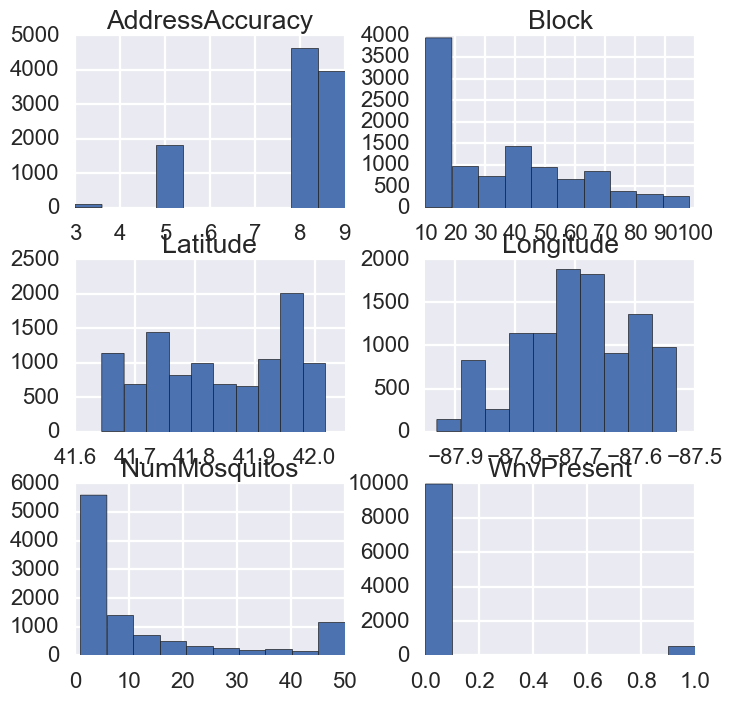

In [251]:
print list(df_train.columns)
df_train.hist(figsize=(8,8))

### Test.csv

['Id', 'Date', 'Address', 'Species', 'Block', 'Street', 'Trap', 'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy']


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12f29cfd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12fad4d50>]], dtype=object)

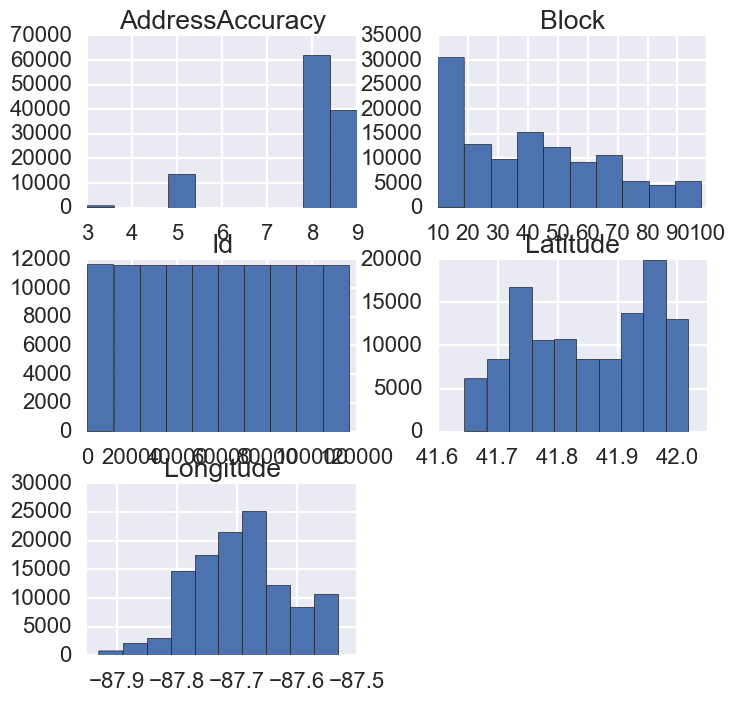

In [252]:
print list(df_test.columns)
df_test.hist(figsize=(8,8))

### Spray.csv

['Date', 'Time', 'Latitude', 'Longitude']


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12f2fa410>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12e837110>]], dtype=object)

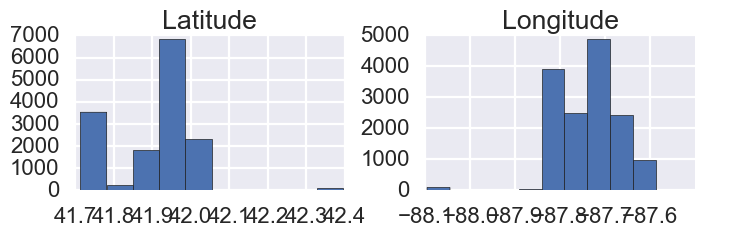

In [253]:
print list(df_spray.columns)
df_spray.hist(figsize=(8,2))

### Weather.csv

['Station', 'Date', 'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint', 'WetBulb', 'Heat', 'Cool', 'Sunrise', 'Sunset', 'CodeSum', 'Depth', 'Water1', 'SnowFall', 'PrecipTotal', 'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir', 'AvgSpeed']


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x130aaa5d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x130ca06d0>]], dtype=object)

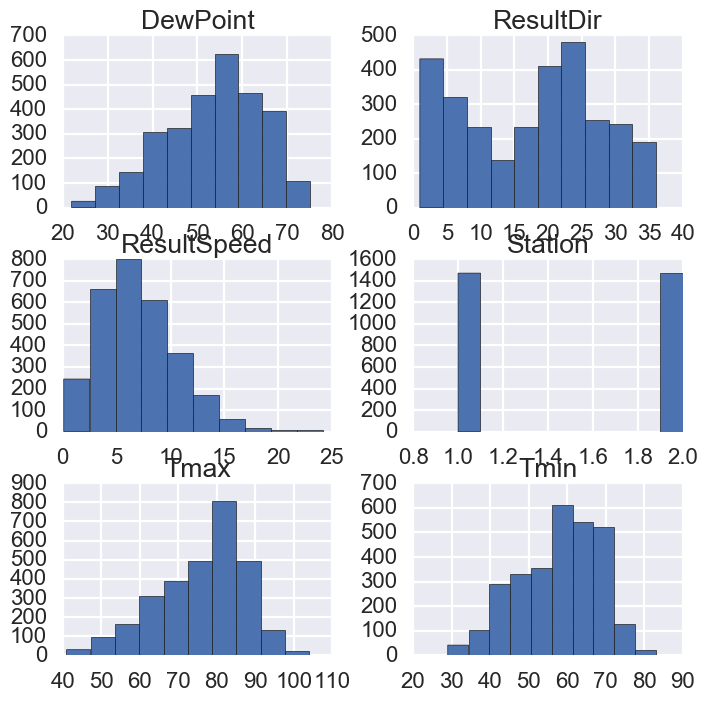

In [254]:
print list(df_weather.columns)
df_weather.hist(figsize=(8,8))

In [255]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
#%matplotlib inline

from sklearn.neighbors import KernelDensity

In [256]:
mapdata = np.loadtxt("assets/mapdata_copyright_openstreetmap_contributors.txt")
traps = pd.read_csv('assets/train.csv')[['Date', 'Trap','Longitude', 'Latitude', 'WnvPresent']]

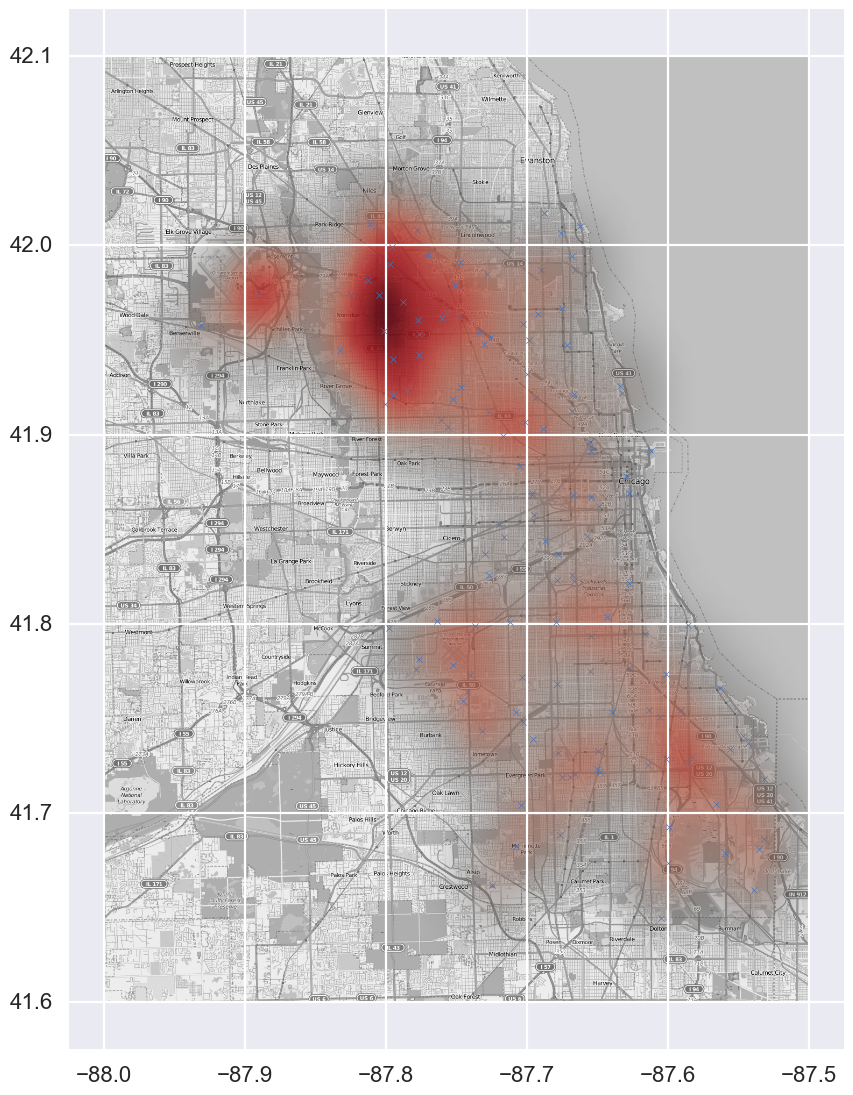

In [257]:
alpha_cm = plt.cm.Reds
alpha_cm._init()
alpha_cm._lut[:-3,-1] = abs(np.logspace(0, 1, alpha_cm.N) / 10 - 1)[::-1]
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

sigthings = traps[traps['WnvPresent'] > 0]
sigthings = sigthings.groupby(['Date', 'Trap','Longitude', 'Latitude']).max()['WnvPresent'].reset_index()
X = sigthings[['Longitude', 'Latitude']].values
kd = KernelDensity(bandwidth=0.02)
kd.fit(X)

xv,yv = np.meshgrid(np.linspace(-88, -87.5, 100), np.linspace(41.6, 42.1, 100))
gridpoints = np.array([xv.ravel(),yv.ravel()]).T
zv = np.exp(kd.score_samples(gridpoints).reshape(100,100))
plt.figure(figsize=(10,14))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)
plt.imshow(zv, 
           origin='lower', 
           cmap=alpha_cm, 
           extent=lon_lat_box, 
           aspect=aspect)

locations = traps[['Longitude', 'Latitude']].drop_duplicates().values
plt.scatter(locations[:,0], locations[:,1], marker='x')

In [258]:
X

array([[-87.531635,  41.686398],
       [-87.599862,  41.673408],
       [-87.800991,  41.95469 ],
       [-87.777921,  42.008314],
       [-87.824812,  41.974089],
       [-87.752411,  41.778297],
       [-87.627796,  41.821582],
       [-87.642984,  41.803423],
       [-87.676709,  41.688324],
       [-87.666901,  41.868077],
       [-87.677512,  41.731922],
       [-87.536497,  41.702724],
       [-87.724608,  41.662014],
       [-87.585413,  41.726465],
       [-87.794896,  41.94016 ],
       [-87.69181 ,  41.963976],
       [-87.677512,  41.731922],
       [-87.585413,  41.726465],
       [-87.535198,  41.680946],
       [-87.777921,  42.008314],
       [-87.832763,  41.944869],
       [-87.787992,  41.970248],
       [-87.824812,  41.974089],
       [-87.811506,  42.011601],
       [-87.642984,  41.803423],
       [-87.795585,  41.999129],
       [-87.688267,  41.903002],
       [-87.614258,  41.725517],
       [-87.536497,  41.702724],
       [-87.599862,  41.673408],
       [-8

## Testing an idea here for clustering.

In [259]:
df_train.columns

Index([u'Date', u'Address', u'Species', u'Block', u'Street', u'Trap',
       u'AddressNumberAndStreet', u'Latitude', u'Longitude',
       u'AddressAccuracy', u'NumMosquitos', u'WnvPresent'],
      dtype='object')

In [260]:
print df_spray.shape
df_spray.head()

(14835, 4)


,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [345]:
df_spray2 = df_spray[['Date','Latitude', 'Longitude']]
df_spray2['count'] = 1
df_spray2['loc'] = df_spray2['Latitude'] + df_spray2['Longitude']

year_holder = []
for i in df_spray2['Date']:
    year_holder.append(i[:-3])
df_spray2['Year'] = year_holder

month = []
for i in df_spray2['Year']:
    month.append(i[5:])
df_spray2['Month'] = month

year_final = []
for i in df_spray2['Year']:
    year_final.append(i[:-3])
df_spray2['Year'] = year_final

loc_final1 = []
for i in df_spray2['loc']:
    loc_final1.append(round(i, 2))
df_spray2['loc_simple'] = loc_final1
df_spray2['loc_simple'] = df_spray2['loc_simple']

In [346]:
#Grouping
df_spray4 = df_spray2.groupby(['Year', 'Month','loc']).mean().reset_index()
df_spray3 = df_spray2.groupby(['Year', 'Month','loc']).count().reset_index()
df_spray3['Latitude'] = df_spray4['Latitude']
df_spray3['Longitude'] = df_spray4['Longitude']
df_spray3['loc_simple'] = df_spray4['loc_simple']
df_spray3.drop(['Date'], axis=1, inplace=True)

#Filtering
df_spray3 = df_spray3[df_spray3['Year'].astype(int) == 2013]
df_spray3 = df_spray3[df_spray3['Month'].astype(int) == 7]

In [347]:
print df_spray3.shape
df_spray3.head()

(3777, 7)


,Year,Month,loc,Latitude,Longitude,count,loc_simple
1617,2013,07,-45.945443,41.714098,-87.659542,1,-45.95
1618,2013,07,-45.945350,41.714558,-87.659908,1,-45.95
1619,2013,07,-45.945108,41.715073,-87.660182,1,-45.95
1620,2013,07,-45.944803,41.715720,-87.660523,1,-45.94
1621,2013,07,-45.944540,41.714112,-87.658652,1,-45.94


In [348]:
df_train2 = df_train[['Date','Latitude', 'Longitude', 'NumMosquitos', 'WnvPresent']]
df_train2['loc'] = df_train2['Latitude'] + df_train2['Longitude']

year_holder = []
for i in df_train2['Date']:
    year_holder.append(i[:-3])
df_train2['Year'] = year_holder

month = []
for i in df_train2['Year']:
    month.append(i[5:])
df_train2['Month'] = month

year_final = []
for i in df_train2['Year']:
    year_final.append(i[:-3])
df_train2['Year'] = year_final

/Users/nathanhall/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/nathanhall/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/nathanhall/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [349]:
loc_final = []
for i in df_train2['loc']:
    loc_final.append(round(i,2))
df_train2['loc_simple'] = loc_final

/Users/nathanhall/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [416]:
df_train4 = df_train2.groupby(['Year', 'Month','loc']).mean().reset_index()
df_train3 = df_train2.groupby(['Year', 'Month','loc']).count().reset_index()
df_train5 = df_train2.groupby(['Year', 'Month','loc']).sum().reset_index()
df_train3['Latitude'] = df_train4['Latitude']
df_train3['Longitude'] = df_train4['Longitude']
df_train3['loc_simple'] = df_train4['loc_simple']
df_train3['NumMosquitos'] = df_train5['NumMosquitos']
df_train3['WnvPresent'] = df_train5['WnvPresent']
df_train3.drop(['Date'], axis=1, inplace=True)

In [417]:
#Filtering
df_train3 = df_train3[df_train3['Year'].astype(int) == 2013]
df_train3 = df_train3[df_train3['Month'].astype(int) == 8]

In [361]:
#pd.merge(df_train3, df_spray3, how='outer', on='loc_simple')

In [362]:
#df_train3 = df_train3.join(df_spray3, on='loc', lsuffix='_left', rsuffix='_right')

In [436]:
df_train3.head()

,Year,Month,loc,Latitude,Longitude,NumMosquitos,WnvPresent,loc_simple,X,Y
1307,2013,08,-46.062594,41.662014,-87.724608,155,0,-46.06,inf,87.724608
1308,2013,08,-46.025386,41.682587,-87.707973,399,2,-46.03,8315.676107,87.707973
1309,2013,08,-46.002771,41.776156,-87.778927,55,2,-46.00,1148.844290,87.778927
1310,2013,08,-45.999400,41.704336,-87.703736,63,1,-46.00,2627.373168,87.703736
1311,2013,08,-45.988033,41.743402,-87.731435,290,5,-45.99,2421.117316,87.731435


In [450]:
df_train3['X'] = (df_train3['Latitude']/abs(df_train3['Longitude']))
df_train3['Y'] = (df_train3['NumMosquitos'])

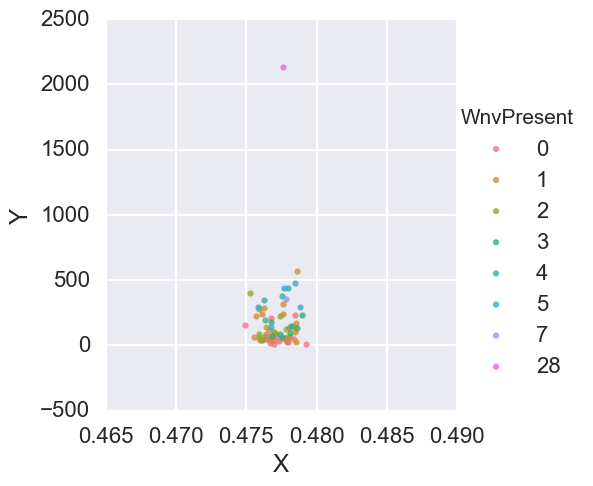

In [451]:
sns.lmplot(x='X', y='Y', hue='WnvPresent', fit_reg=False, data=df_train3)

In [399]:
import hdbscan

In [411]:
clusterer = hdbscan.HDBSCAN(min_samples=5)

In [412]:
clusterer.fit(df_train3)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
    approx_min_span_tree=True, core_dist_n_jobs=4, gen_min_span_tree=False,
    leaf_size=40, match_reference_implementation=False,
    memory=Memory(cachedir=None), metric='euclidean', min_cluster_size=5,
    min_samples=5, p=None)

In [413]:
df_train3['labels'] = clusterer.labels_

In [414]:
df_train3.groupby(['labels']).sum()

,loc,Latitude,Longitude,NumMosquitos,WnvPresent,loc_simple,X,Y
labels,,,,,,,,
-1,-870.505018,796.034737,-1666.539755,290,290,-870.53,796.034737,1666.539755
0,-275.127985,250.869639,-525.997624,72,72,-275.12,250.869639,525.997624
1,-641.899316,585.632241,-1227.531557,184,184,-641.90,585.632241,1227.531557
2,-321.077151,292.840693,-613.917844,70,70,-321.07,292.840693,613.917844
3,-274.940175,250.783586,-525.723761,42,42,-274.94,250.783586,525.723761
4,-367.242599,334.501591,-701.744190,72,72,-367.24,334.501591,701.744190
5,-595.935754,544.225648,-1140.161402,104,104,-595.94,544.225648,1140.161402


In [404]:
df_train3

,Year,Month,loc,Latitude,Longitude,NumMosquitos,WnvPresent,loc_simple,X,Y,labels
1307,2013,08,-46.062594,41.662014,-87.724608,13,13,-46.06,41.662014,87.724608,1
1308,2013,08,-46.025386,41.682587,-87.707973,16,16,-46.03,41.682587,87.707973,-1
1309,2013,08,-46.002771,41.776156,-87.778927,9,9,-46.00,41.776156,87.778927,4
1310,2013,08,-45.999400,41.704336,-87.703736,9,9,-46.00,41.704336,87.703736,4
1311,2013,08,-45.988033,41.743402,-87.731435,12,12,-45.99,41.743402,87.731435,0
1312,2013,08,-45.978569,41.763733,-87.742302,8,8,-45.98,41.763733,87.742302,5
1313,2013,08,-45.974114,41.778297,-87.752411,9,9,-45.97,41.778297,87.752411,4
1314,2013,08,-45.973196,41.957799,-87.930995,4,4,-45.97,41.957799,87.930995,-1
1315,2013,08,-45.961918,41.801498,-87.763416,10,10,-45.96,41.801498,87.763416,2
1316,2013,08,-45.945166,41.720848,-87.666014,9,9,-45.95,41.720848,87.666014,4
